In [76]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [35]:
df = pd.read_parquet('/home/mpaprocki/mlops-zoomcamp1.2.2-1/notebooks/data/yellow_tripdata_2023-01.parquet')

In [36]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN


In [39]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() /60)

In [40]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.30,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.90,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.90,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.10,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.40,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3066761,2,2023-01-31 23:58:34,2023-02-01 00:12:33,NaN,3.05,NaN,None,107,48,0,15.80,0.00,0.5,3.96,0.0,1.0,23.76,NaN,NaN,13.983333
3066762,2,2023-01-31 23:31:09,2023-01-31 23:50:36,NaN,5.80,NaN,None,112,75,0,22.43,0.00,0.5,2.64,0.0,1.0,29.07,NaN,NaN,19.450000
3066763,2,2023-01-31 23:01:05,2023-01-31 23:25:36,NaN,4.67,NaN,None,114,239,0,17.61,0.00,0.5,5.32,0.0,1.0,26.93,NaN,NaN,24.516667
3066764,2,2023-01-31 23:40:00,2023-01-31 23:53:00,NaN,3.15,NaN,None,230,79,0,18.15,0.00,0.5,4.43,0.0,1.0,26.58,NaN,NaN,13.000000


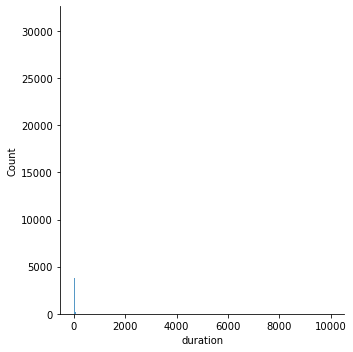

In [41]:
sns.displot(df.duration)

In [77]:
df.duration.describe()

count   3066766.00
mean         15.67
std          42.59
min         -29.20
25%           7.12
50%          11.52
75%          18.30
max       10029.18
Name: duration, dtype: float64

In [46]:
caterogical =['PULocationID','DOLocationID']
numerical = ['trip_distance']

In [47]:
df[caterogical]

,PULocationID,DOLocationID
0,161,141
1,43,237
2,48,238
3,138,7
4,107,79
...,...,...
3066761,107,48
3066762,112,75
3066763,114,239
3066764,230,79


In [48]:
df[caterogical].dtypes

PULocationID    int64
DOLocationID    int64
dtype: object

In [50]:
df[caterogical].astype(str).dtypes

PULocationID    object
DOLocationID    object
dtype: object

In [51]:
df[caterogical] = df[caterogical].astype(str)

In [53]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                     object
DOLocationID                     object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
duration                        float64
dtype: object

In [55]:
df[caterogical + numerical]

,PULocationID,DOLocationID,trip_distance
0,161,141,0.97
1,43,237,1.10
2,48,238,2.51
3,138,7,1.90
4,107,79,1.43
...,...,...,...
3066761,107,48,3.05
3066762,112,75,5.80
3066763,114,239,4.67
3066764,230,79,3.15


In [57]:
df[caterogical + numerical].iloc[:10].to_dict(orient='records')

[{'PULocationID': '161', 'DOLocationID': '141', 'trip_distance': 0.97},
 {'PULocationID': '43', 'DOLocationID': '237', 'trip_distance': 1.1},
 {'PULocationID': '48', 'DOLocationID': '238', 'trip_distance': 2.51},
 {'PULocationID': '138', 'DOLocationID': '7', 'trip_distance': 1.9},
 {'PULocationID': '107', 'DOLocationID': '79', 'trip_distance': 1.43},
 {'PULocationID': '161', 'DOLocationID': '137', 'trip_distance': 1.84},
 {'PULocationID': '239', 'DOLocationID': '143', 'trip_distance': 1.66},
 {'PULocationID': '142', 'DOLocationID': '200', 'trip_distance': 11.7},
 {'PULocationID': '164', 'DOLocationID': '236', 'trip_distance': 2.95},
 {'PULocationID': '141', 'DOLocationID': '107', 'trip_distance': 3.01}]

In [75]:
df[caterogical + numerical].to_dict(orient='records')

[{'PULocationID': '161', 'DOLocationID': '141', 'trip_distance': 0.97},
 {'PULocationID': '43', 'DOLocationID': '237', 'trip_distance': 1.1},
 {'PULocationID': '48', 'DOLocationID': '238', 'trip_distance': 2.51},
 {'PULocationID': '138', 'DOLocationID': '7', 'trip_distance': 1.9},
 {'PULocationID': '107', 'DOLocationID': '79', 'trip_distance': 1.43},
 {'PULocationID': '161', 'DOLocationID': '137', 'trip_distance': 1.84},
 {'PULocationID': '239', 'DOLocationID': '143', 'trip_distance': 1.66},
 {'PULocationID': '142', 'DOLocationID': '200', 'trip_distance': 11.7},
 {'PULocationID': '164', 'DOLocationID': '236', 'trip_distance': 2.95},
 {'PULocationID': '141', 'DOLocationID': '107', 'trip_distance': 3.01},
 {'PULocationID': '234', 'DOLocationID': '68', 'trip_distance': 1.8},
 {'PULocationID': '79', 'DOLocationID': '264', 'trip_distance': 7.3},
 {'PULocationID': '164', 'DOLocationID': '143', 'trip_distance': 3.23},
 {'PULocationID': '138', 'DOLocationID': '33', 'trip_distance': 11.43},
 {'

In [ ]:
train_dicts = df[caterogical + numerical].to_dict(orient='records')

In [59]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [60]:
X_train

<3066766x519 sparse matrix of type '<class 'numpy.float64'>'
	with 9200298 stored elements in Compressed Sparse Row format>

In [61]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=105',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=109',
 'DOLocationID=11',
 'DOLocationID=111',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=115',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=118',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',

In [65]:
target = 'duration'
y_train = df[target].values

In [67]:
y_train

array([ 8.43333333,  6.31666667, 12.75      , ..., 24.51666667,
       13.        , 14.4       ])

In [70]:
lr = LinearRegression()
lr.fit(X_train , y_train)

LinearRegression()

In [71]:
y_pred = lr.predict(X_train)

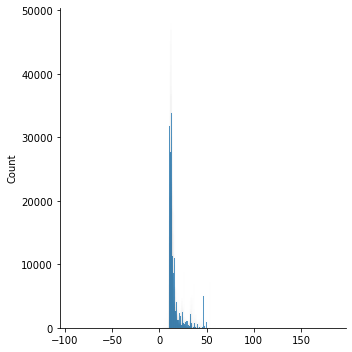

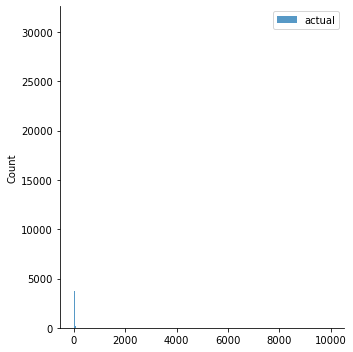

In [72]:
sns.displot(y_pred , label='prediction')
sns.displot(y_train , label='actual')

plt.legend()

In [74]:
mean_squared_error(y_train , y_pred, squared=False)

41.99654984952854